In [ ]:
#Importamos las librerias

# Operaciones Basicas
import numpy as np
import pandas as pd
import pandas_profiling
import os
from datetime import datetime

# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from seaborn import distplot
from sklearn import preprocessing


# Modelos y etc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Matriz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix















# Generacion del Dataframe (df)

In [ ]:
df = pd.read_csv(r'C:\Users\nicus\OneDrive\Desktop\Programing\proyectos\prev de fraudes\datasetsparamodelo\trainf.csv')
df.head(7)

Unnamed: 0.1  Unnamed: 0 trans_date_trans_time            cc_num  \
0             0           0   2019-01-01 00:00:18  2703186189652095   
1             1           1   2019-01-01 00:00:44      630423337322   
2             2           2   2019-01-01 00:00:51    38859492057661   
3             3           3   2019-01-01 00:01:16  3534093764340240   
4             4           4   2019-01-01 00:03:06   375534208663984   
5             5           5   2019-01-01 00:04:08  4767265376804500   
6             6           6   2019-01-01 00:04:42    30074693890476   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   

       last gender  ...      lat      long city_pop  \
0     Banks      F  ...  36.0788  -81.1781   3495.0   
1      Gill      F  ...  48.8878 -118.2105    149.0   
2   Sanchez      M  ...  42.1808 -112.2620   4154.0   
3     White      M  ...  46.2306 -112.1138   1939.0   
4    Garcia      M  ...  38.4207  -79.4629     99.0   
5    Conner      F  ...  40.3750  -75.2045   2158.0   
6  Richards      F  ...  37.9931 -100.9893   2691.0   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   
5                  Transport planner  1961-06-19   
6                    Arboriculturist  1993-08-16   

                          trans_num     unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1.325376e+09  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1.325376e+09  37.162705 -100.153370   

  is_fraud  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  

[7 rows x 24 columns]

# Analisis del df

In [ ]:
# el shape de nuestro df

print('Este dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este dataset tiene 600000 filas, y 24 columnas


In [ ]:
# revisamos el método .info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             600000 non-null  int64  
 1   Unnamed: 0.1           600000 non-null  int64  
 2   trans_date_trans_time  600000 non-null  object 
 3   cc_num                 600000 non-null  int64  
 4   merchant               600000 non-null  object 
 5   category               600000 non-null  object 
 6   amt                    600000 non-null  float64
 7   first                  600000 non-null  object 
 8   last                   600000 non-null  object 
 9   gender                 600000 non-null  object 
 10  street                 600000 non-null  object 
 11  city                   600000 non-null  object 
 12  state                  600000 non-null  object 
 13  zip                    600000 non-null  float64
 14  lat                    600000 non-nu

In [ ]:
# eliminamos columnas que no se utilizarán para el análisis

df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time'])

In [ ]:
# nombre de columnas

df.columns

Index(['Unnamed: 0.1', 'trans_date_trans_time', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# revisamos los Principales Estadisticos (pivot)

df.describe().T

count           mean            std          min  \
Unnamed: 0.1  600000.0  299999.500000  173205.225094     0.000000   
amt           600000.0      70.277534     158.332110     1.000000   
zip           600000.0   48765.593803   26908.885784  1257.000000   
lat           600000.0      38.537569       5.074403    20.027100   
long          600000.0     -90.210855      13.768362  -165.672300   
city_pop      600000.0   89110.560567  302990.782526    23.000000   
merch_lat     600000.0      38.537173       5.108151    19.029798   
merch_long    600000.0     -90.211297      13.780443  -166.671242   
is_fraud      600000.0       0.005863       0.076348     0.000000   

                        25%            50%            75%           max  
Unnamed: 0.1  149999.750000  299999.500000  449999.250000  5.999990e+05  
amt                9.640000      47.390000      83.070000  2.508694e+04  
zip            26041.000000   48154.000000   72011.000000  9.978300e+04  
lat               34.668900      39.354300      41.894800  6.669330e+01  
long             -96.790900     -87.458100     -80.138100 -6.795030e+01  
city_pop         743.000000    2456.000000   20478.000000  2.906700e+06  
merch_lat         34.741897      39.366208      41.955407  6.751027e+01  
merch_long       -96.878002     -87.410123     -80.212446 -6.695654e+01  
is_fraud           0.000000       0.000000       0.000000  1.000000e+00

# **Con Pandas Profiling hacemos un análisis más profundo**


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Análisis Univariado**

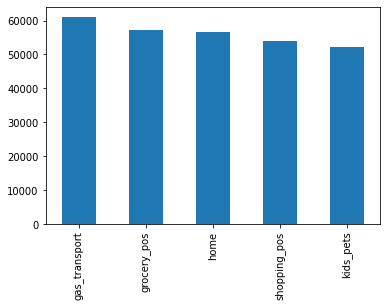

In [ ]:
# gráfico de barras con la función value_counts() sobre la variable: 'category', del top 5

df['category'].value_counts().head(5).plot.bar()

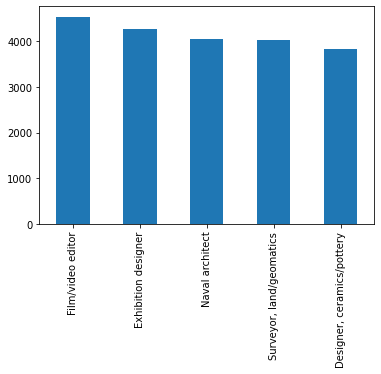

In [ ]:
# y otro gráfico de barras sobre la variable: 'job' (top 5)

df['job'].value_counts().head(5).plot.bar()

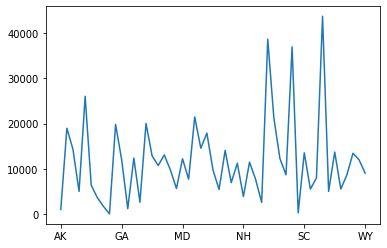

In [ ]:
# gráfico de líneas de la variable: 'state', utilizando la función value_counts() ordenado: sort_index()

df['state'].value_counts().sort_index().plot.line()

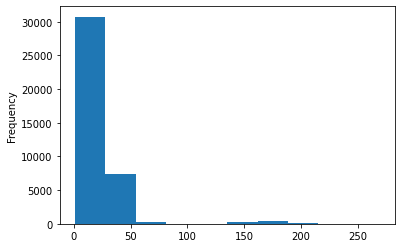

In [ ]:
# y además un histograma de la variable 'amt'

df['amt'].value_counts().plot.hist()

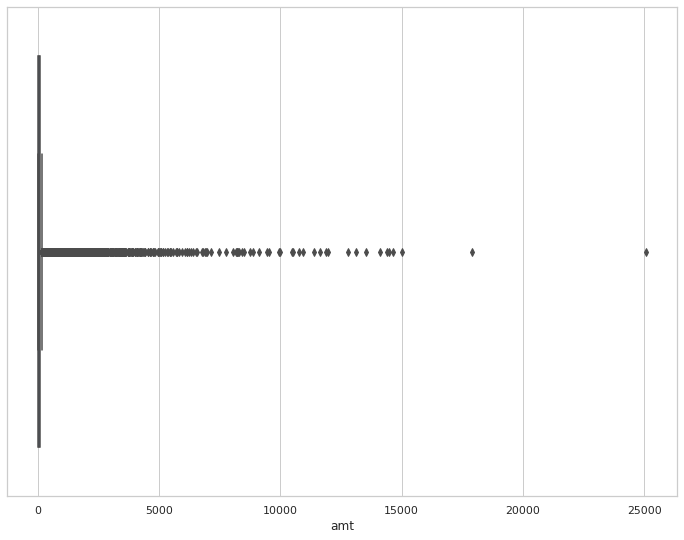

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(x=df["amt"])

# **Distribución de Frecuencias**

In [ ]:
# análisis de la frecuencia de cada 'category'

frec_cat = df["category"].value_counts()                                             

df_frec_cat = pd.DataFrame(frec_cat)                                                      # creamos un Dataframe con la información
df_frec_cat.rename(columns={'category':'Frec_abs'},inplace=True)

frec_abs = df_frec_cat["Frec_abs"].values                                             # obtenemos los valores de las frecuencias absolutas

acum = []                                                                         # creamos una lista vacia (para guardar las frecuencias absolutas acumuladas)
valor_acum = 0                                                                    # determinamos una variable de origen, en la que guardaremos los valores anteriores

for i in frec_abs:                                                                # iteramos la lista para ir sumandolas
    valor_acum =+ i
    acum.append(valor_acum)
    
df_frec_cat["frec_abs_acum"] = acum

df_frec_cat["frec_rel_%"] = 100 * df_frec_cat["Frec_abs"]/len(df.category)                # calculamos Frecuencia Relativa en %

frec_relat = df_frec_cat["frec_rel_%"].values                                         # y ahora obtenemos los valores de las frecuencias absolutas

acum = []
valor_acum = 0

for i in frec_relat:
    valor_acum =+ i
    acum.append(valor_acum)
    
df_frec_cat["frec_rel_%_acum"] = acum
print(df_frec_cat)

                Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
gas_transport      61062          61062   10.177000        10.177000
grocery_pos        57254          57254    9.542333         9.542333
home               56735          56735    9.455833         9.455833
shopping_pos       54012          54012    9.002000         9.002000
kids_pets          52304          52304    8.717333         8.717333
shopping_net       44943          44943    7.490500         7.490500
entertainment      43542          43542    7.257000         7.257000
food_dining        42500          42500    7.083333         7.083333
personal_care      42118          42118    7.019667         7.019667
health_fitness     39824          39824    6.637333         6.637333
misc_pos           36731          36731    6.121833         6.121833
misc_net           29260          29260    4.876667         4.876667
grocery_net        20918          20918    3.486333         3.486333
travel             18797          

# **Análisis Bivariado**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


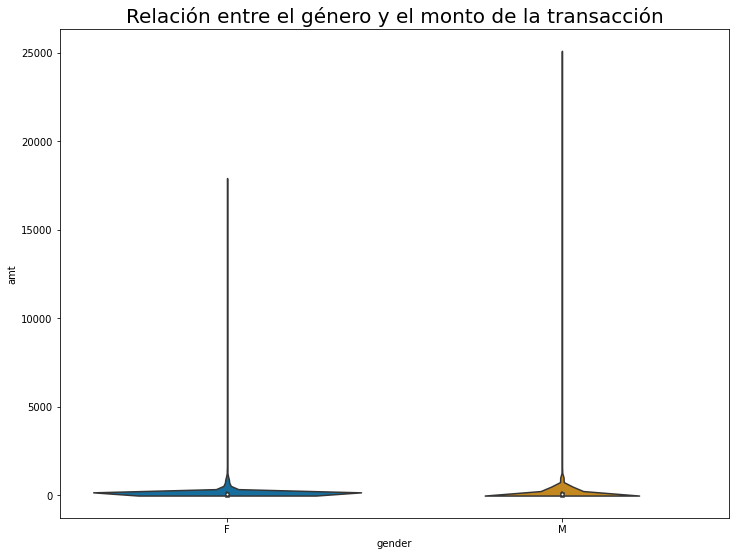

In [ ]:
# relación entre el género y el monto de la transacción

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(df['gender'], df['amt'], palette = 'colorblind')
plt.title('Relación entre el género y el monto de la transacción', fontsize = 20, fontweight = 30)

plt.show()

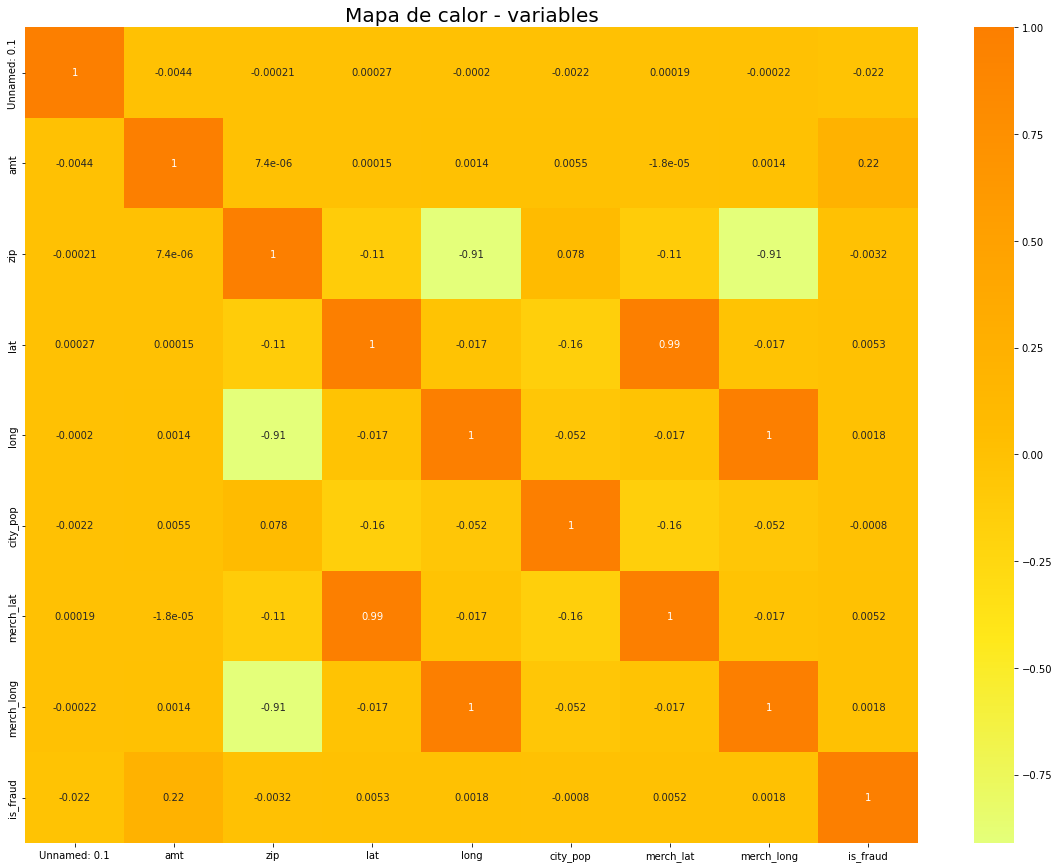

In [ ]:
# hacemos un mapa de calor del dataset

plt.rcParams['figure.figsize'] = (20,15)
sns.heatmap(df.corr(),annot=True,cmap='Wistia')
plt.title('Mapa de calor - variables',fontsize=20)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


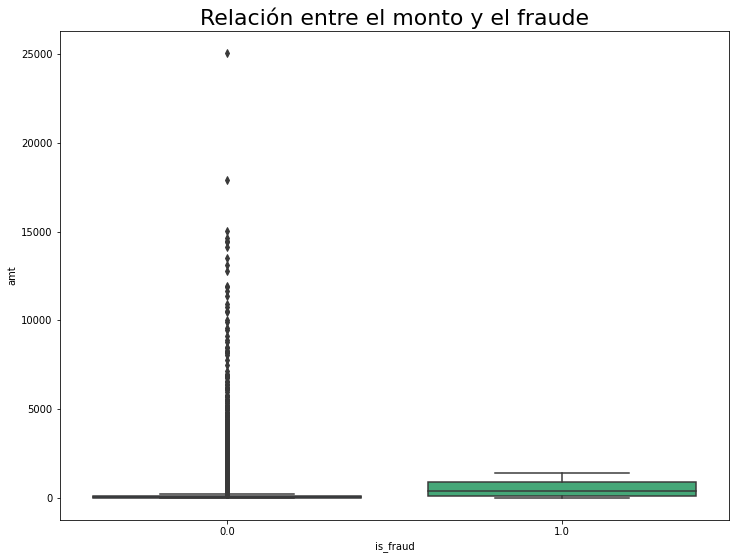

In [ ]:
# relación entre el monto y fraude

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['is_fraud'], df['amt'], palette = 'viridis')
plt.title('Relación entre el monto y el fraude', fontsize = 22)

plt.show()

# Analisis Multivariado


<Figure size 3600x2700 with 0 Axes>

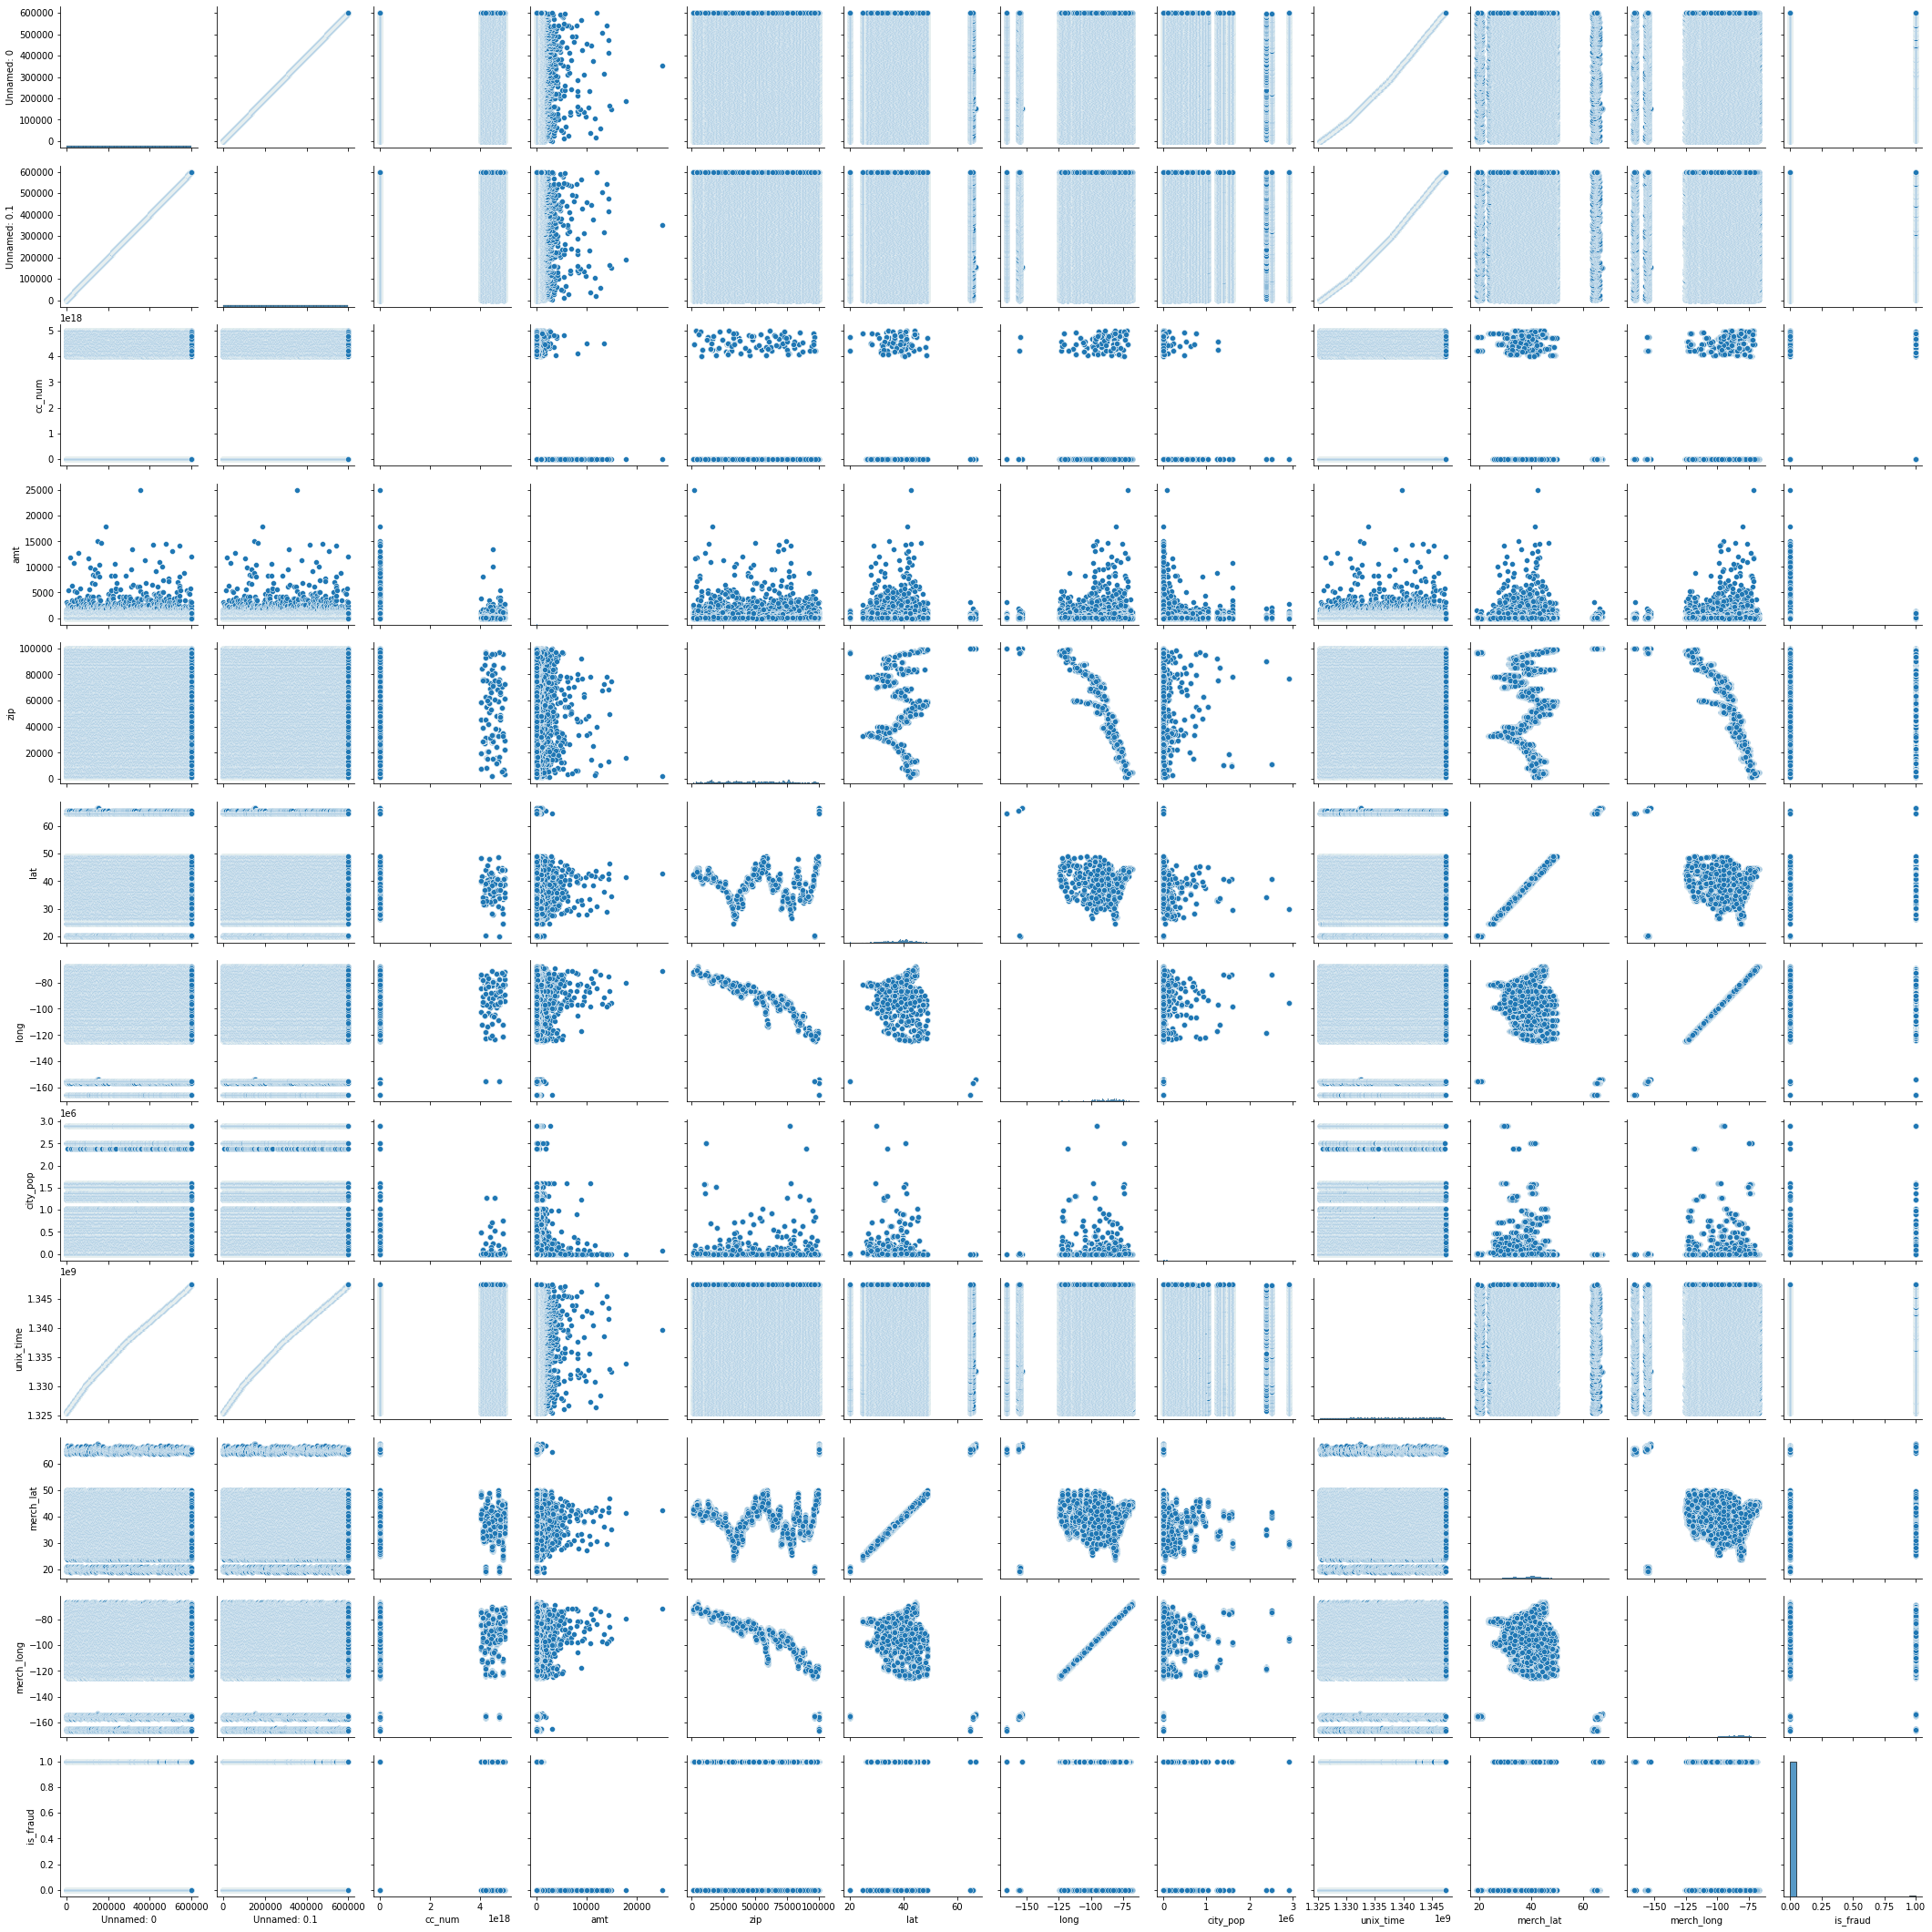

In [ ]:
plt.figure(dpi=300)
sns.pairplot(df)
plt.show()

<Figure size 1800x1350 with 0 Axes>

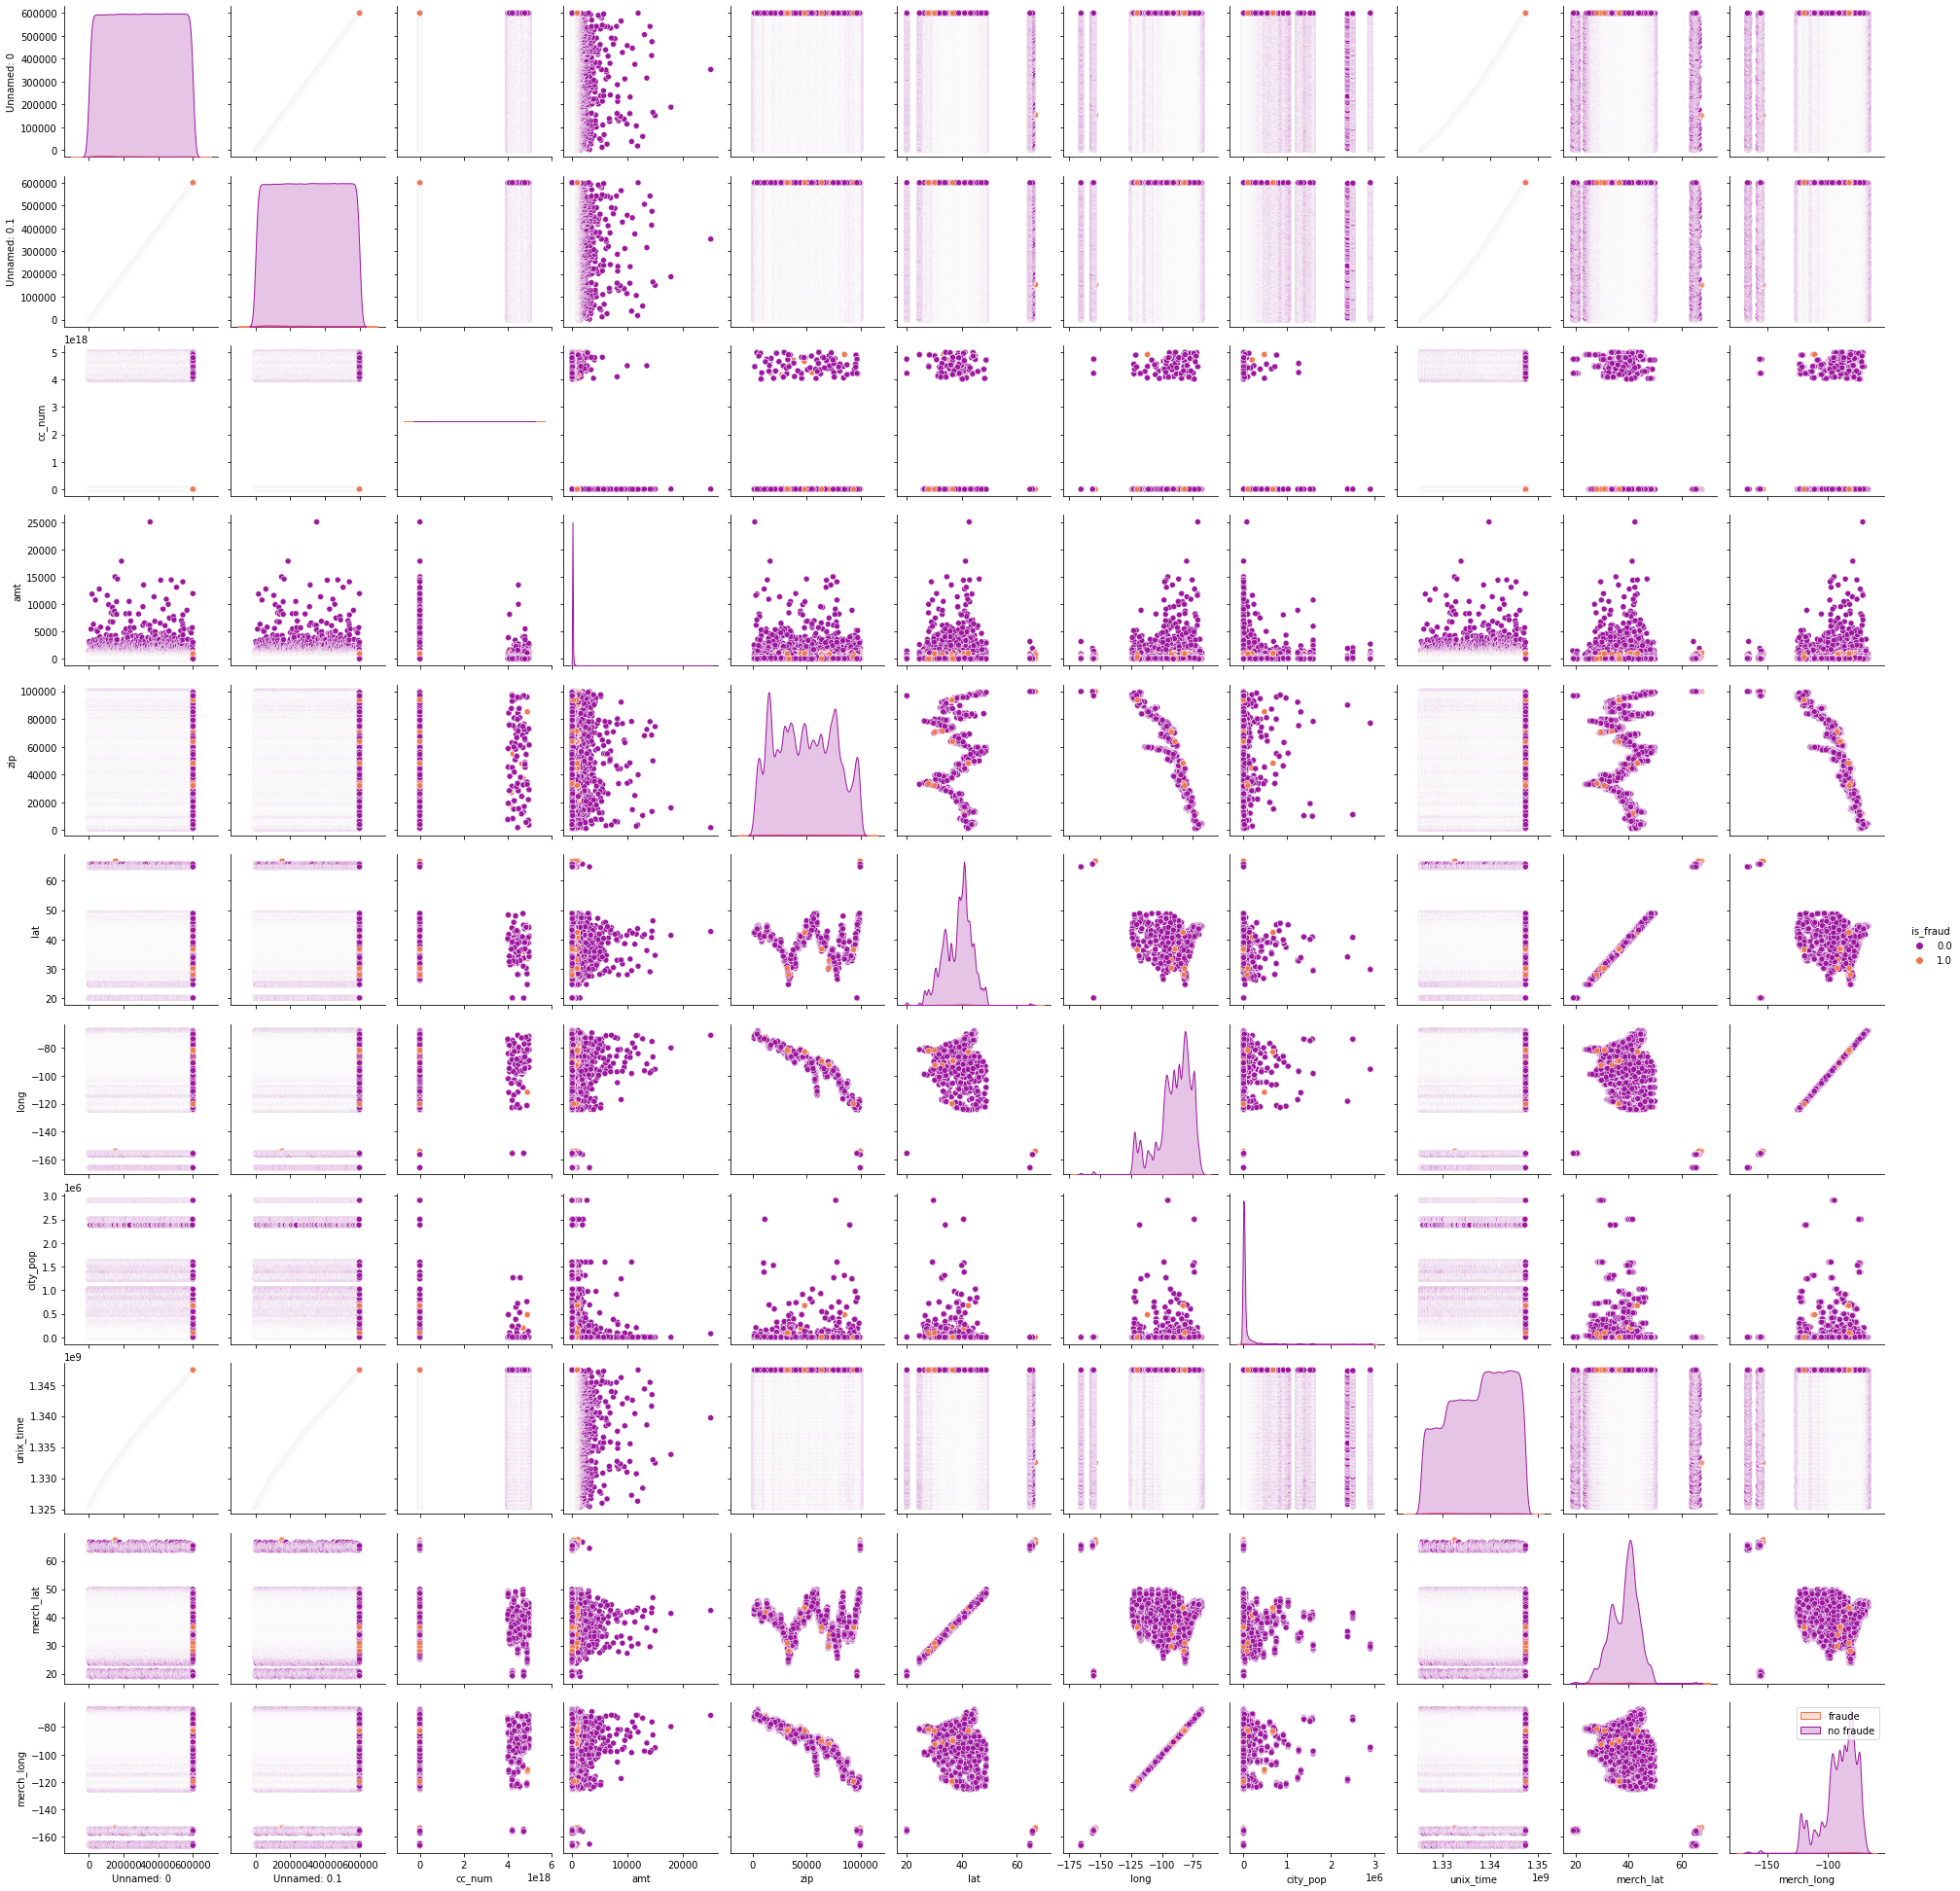

In [ ]:
#fraude vs no fraude
plt.figure(dpi=150)
sns.pairplot(df, hue='is_fraud', palette='plasma')
plt.legend(['fraude', 'no fraude'])
plt.show()

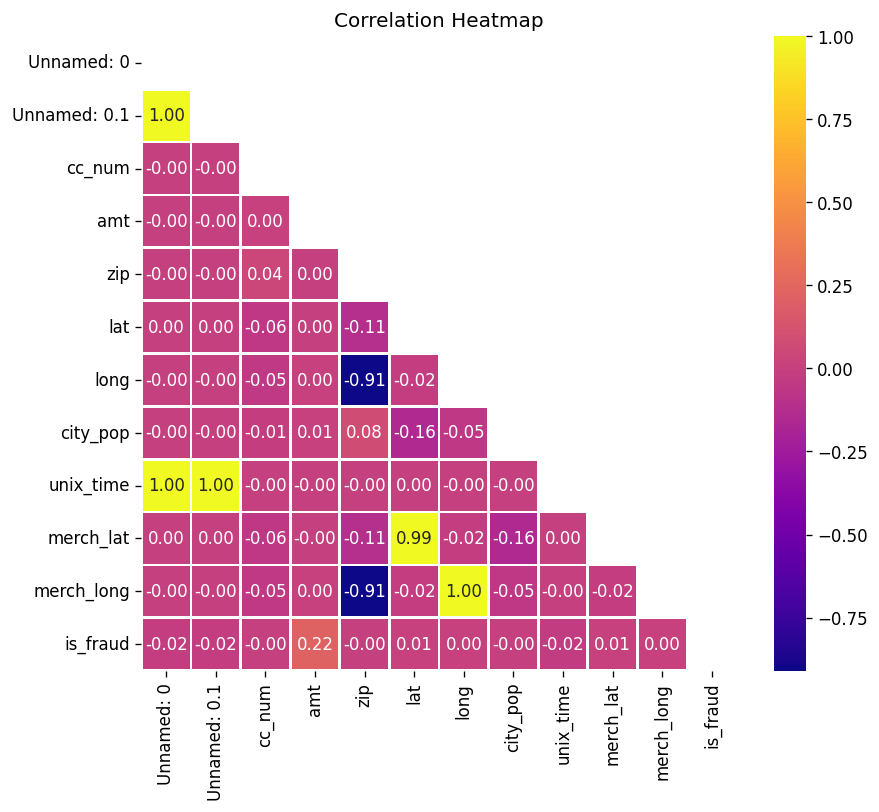

In [ ]:
#Correlaciones
plt.figure(dpi = 120,figsize= (8,7))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

joint


<Figure size 500x400 with 0 Axes>

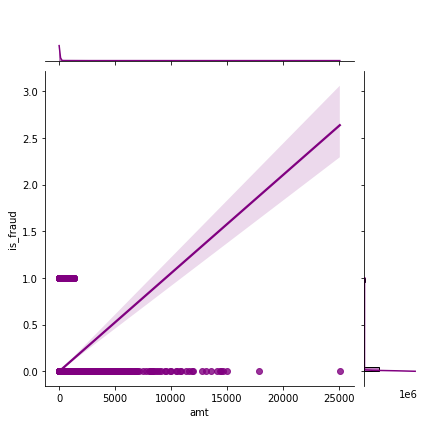

In [ ]:
plt.figure(dpi = 100, figsize = (5,4))
print('joint')
curr='amt'
sns.jointplot(x=curr,y='is_fraud',data=df,kind = 'reg',color = 'purple')
plt.show()

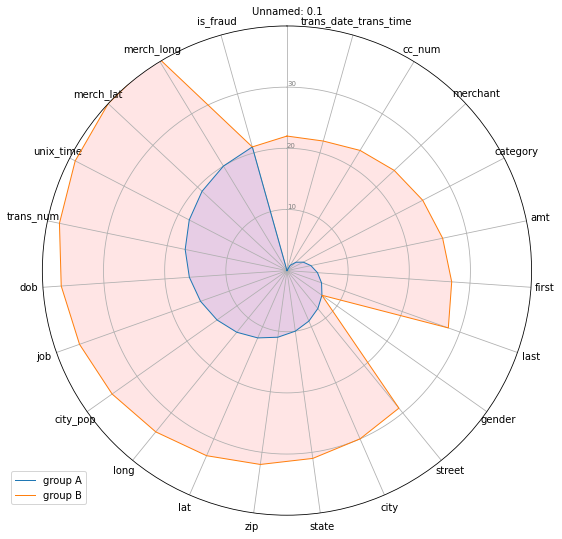

In [ ]:
from math import pi

categories=list(df)[1:]
N = len(categories)
 

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 

ax = plt.subplot(111, polar=True)
 

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)

ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
values=df.loc[0].drop('amt').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 

values=df.loc[1].drop('amt').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

# Preparando la data para dar al modelo
aca vamos a usar el metodo get_dummies() para asignar valores numericos a columnas categoricas como 'gender' y 'category'

In [ ]:
#asigno las columnas que vamos a usar
df2 = df[['category','amt', 'gender', 'is_fraud']].copy()
df2.head()

category     amt gender  is_fraud
0       misc_net    4.97      F       0.0
1    grocery_pos  107.23      F       0.0
2  entertainment  220.11      M       0.0
3  gas_transport   45.00      M       0.0
4       misc_pos   41.96      M       0.0

In [ ]:
#hago el get dummies de genero y categoria
df3 = pd.get_dummies(df2[["gender", "category"]])
df3.head()

gender_F  gender_M  category_entertainment  category_food_dining  \
0         1         0                       0                     0   
1         1         0                       0                     0   
2         0         1                       1                     0   
3         0         1                       0                     0   
4         0         1                       0                     0   

   category_gas_transport  category_grocery_net  category_grocery_pos  \
0                       0                     0                     0   
1                       0                     0                     1   
2                       0                     0                     0   
3                       1                     0                     0   
4                       0                     0                     0   

   category_health_fitness  category_home  category_kids_pets  \
0                        0              0                   0   
1                        0              0                   0   
2                        0              0                   0   
3                        0              0                   0   
4                        0              0                   0   

   category_misc_net  category_misc_pos  category_personal_care  \
0                  1                  0                       0   
1                  0                  0                       0   
2                  0                  0                       0   
3                  0                  0                       0   
4                  0                  1                       0   

   category_shopping_net  category_shopping_pos  category_travel  
0                      0                      0                0  
1                      0                      0                0  
2                      0                      0                0  
3                      0                      0                0  
4                      0                      0                0

In [ ]:
#combino los dos dfs
df4 = pd.concat([df2, df3], axis=1, join='inner')
display(df4)

category     amt gender  is_fraud  gender_F  gender_M  \
0            misc_net    4.97      F       0.0         1         0   
1         grocery_pos  107.23      F       0.0         1         0   
2       entertainment  220.11      M       0.0         0         1   
3       gas_transport   45.00      M       0.0         0         1   
4            misc_pos   41.96      M       0.0         0         1   
...               ...     ...    ...       ...       ...       ...   
599995  personal_care   37.99      M       0.0         0         1   
599996      kids_pets   87.79      F       0.0         1         0   
599997           home  138.64      M       0.0         0         1   
599998  entertainment    6.51      M       0.0         0         1   
599999   shopping_pos  953.49      F       1.0         1         0   

        category_entertainment  category_food_dining  category_gas_transport  \
0                            0                     0                       0   
1                            0                     0                       0   
2                            1                     0                       0   
3                            0                     0                       1   
4                            0                     0                       0   
...                        ...                   ...                     ...   
599995                       0                     0                       0   
599996                       0                     0                       0   
599997                       0                     0                       0   
599998                       1                     0                       0   
599999                       0                     0                       0   

        category_grocery_net  category_grocery_pos  category_health_fitness  \
0                          0                     0                        0   
1                          0                     1                        0   
2                          0                     0                        0   
3                          0                     0                        0   
4                          0                     0                        0   
...                      ...                   ...                      ...   
599995                     0                     0                        0   
599996                     0                     0                        0   
599997                     0                     0                        0   
599998                     0                     0                        0   
599999                     0                     0                        0   

        category_home  category_kids_pets  category_misc_net  \
0                   0                   0                  1   
1                   0                   0                  0   
2                   0                   0                  0   
3                   0                   0                  0   
4                   0                   0                  0   
...               ...                 ...                ...   
599995              0                   0                  0   
599996              0                   1                  0   
599997              1                   0                  0   
599998              0                   0                  0   
599999              0                   0                  0   

        category_misc_pos  category_personal_care  category_shopping_net  \
0                       0                       0                      0   
1                       0                       0                      0   
2                       0                       0                      0   
3                       0                       0                      0   
4                       1                       0                      0   
...                   ...            

In [ ]:
# Con .pop nos deshacemos de Gender y Category ya que ya estan convertidos
df4.pop('gender')

0         F
1         F
2         M
3         M
4         M
         ..
599995    M
599996    F
599997    M
599998    M
599999    F
Name: gender, Length: 600000, dtype: object

In [ ]:
df4.pop('category')

0              misc_net
1           grocery_pos
2         entertainment
3         gas_transport
4              misc_pos
              ...      
599995    personal_care
599996        kids_pets
599997             home
599998    entertainment
599999     shopping_pos
Name: category, Length: 600000, dtype: object

**Ahora el dataframe esta listo para el modelo**

# Hora de hacer el split y la asignacion de Y

In [ ]:
X=df4.drop('is_fraud', axis=1)
y=df4['is_fraud']

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=0)

# **Modelos**


**XGBoost** 

*es una biblioteca de aumento de gradiente distribuida optimizada diseñada para ser altamente eficiente, flexible y portátil.
Se trata de un algoritmo paralelizable. Esto nos permite usar de manera óptima toda la potencia de procesado de la que disponemos*

In [ ]:

clf_xgb=xgb.XGBClassifier(objetive='binary:logistic',n_estimators=100,seed=123)
clf_xgb.fit(x_train,y_train) #Entrenamos el modelo 
y_pred = clf_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.9972777777777778

**LightGBM** 

*es un marco de mejora de gradiente que utiliza algoritmos de aprendizaje basados ​​en árboles. Está diseñado para ser distribuido y eficiente con las siguientes ventajas*:

*Mayor velocidad de entrenamiento y mayor eficiencia.*

*Menor uso de memoria.*

*Mejor precisión.*

*Soporte de aprendizaje paralelo, distribuido y GPU.*

*Capaz de manejar datos a gran escala.*

In [ ]:
import lightgbm as lbm
clf_lbm=lbm.LGBMClassifier(max_depth=2)
clf_lbm.fit(x_train,y_train) #Entrenamos el modelo 
y_pred = clf_lbm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy 

0.9964222222222222

**Gradient Boosting Classifier**

*Los clasificadores de aumento de gradiente son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo sólido. Los árboles de decisión generalmente se usan cuando se hace un aumento de gradiente.*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(x_train,y_train) #Entrenamos el modelo 
y_test_pred = gbrt.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy 

0.9972888888888889

**AdaBoost**

*AdaBoost se puede utilizar para aumentar el rendimiento de cualquier algoritmo de aprendizaje automático. Se utiliza mejor con modelos débiles. Estos son modelos que logran una precisión justo por encima del azar en un problema de clasificación. El algoritmo más adecuado y, por lo tanto, más común utilizado con AdaBoost son los árboles de decisión con un nivel.*

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)
ada.fit(x_train,y_train) #Entrenamos el modelo 
y_test_pred = ada.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy 

0.9934555555555555

# **Standard models vs Gridsearch vs Random Search**

En esta parte haremos una comparacion de varios modelos "standard" (Random forest, Logistic Regression y LGB).
Luego utilizaremos GridSearch y RandomSearch para comparar resultados

In [ ]:
cols = ['Case','RndForest','LogReg','LGB']
resul = pd.DataFrame(columns=cols)
resul.set_index("Case",inplace=True)
resul.loc['Standard'] = [0,0,0]
resul.loc['GridSearch'] = [0,0,0]
resul.loc['RandomSearch'] = [0,0,0]
resul.head()

RndForest  LogReg  LGB
Case                                
Standard              0       0    0
GridSearch            0       0    0
RandomSearch          0       0    0

In [ ]:
rf    = RandomForestClassifier(n_estimators=10)
lr    =  LogisticRegression(solver='liblinear')
lgg   = lgb.LGBMClassifier()
models = [rf,lr,lgg]

col = 0
for model in models:
    model.fit(x_train,y_train.values.ravel())
    resul.iloc[0,col] = model.score(x_test, y_test)
    col += 1

resul.head()

RndForest   LogReg       LGB
Case                                      
Standard       0.995939  0.99345  0.996317
GridSearch     0.000000  0.00000  0.000000
RandomSearch   0.000000  0.00000  0.000000

**Tocamos algunos Hiperparametros para mejorar un poco mas los modelos**

In [ ]:
#Hiperparametros

#Random Forest
n_estimators = [10, 100]#, 1000,10000
max_features = ['sqrt', 'log2']
rf_grid = dict(n_estimators=n_estimators,max_features=max_features)

#Logistic Regression
solvers = ['newton-cg']#, 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [ 1.0, 0.1, 0.01]#100, 10,
lr_grid = dict(solver=solvers,penalty=penalty,C=c_values)

#LGB
class_weight = [None,'balanced']
boosting_type = ['gbdt']# 'goss', 'dart'
num_leaves = [30,50] #list(range(30, 150)),
learning_rate = list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 10)) #1000
lgg_grid = dict(class_weight=class_weight, boosting_type=boosting_type, num_leaves=num_leaves, learning_rate =learning_rate)

In [ ]:
#GRID SEARCH
models = [rf,lr,lgg]
grids = [rf_grid,lr_grid,lgg_grid]
col = 0

for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    grid_search = GridSearchCV(estimator=models[col], 
                  param_grid=grids[col], n_jobs=-1, cv=cv,  
                  scoring='accuracy',error_score=0)
    grid_clf_acc = grid_search.fit(x_train, y_train)
    resul.iloc[1,col] = grid_clf_acc.score(x_test,y_test)
    col += 1

resul.head()

RndForest    LogReg       LGB
Case                                       
Standard       0.995939  0.993450  0.996317
GridSearch     0.995917  0.993439  0.996428
RandomSearch   0.000000  0.000000  0.000000

In [ ]:
#RANDOM SEARCH

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
col = 0
for ind in range(0,len(models)):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, 
                                 random_state=1)
    n_iter_search = 3
    random_search = RandomizedSearchCV(models[col],
    param_distributions=grids[col],n_iter=n_iter_search, cv=cv)
    random_search.fit(x_train,y_train)
    resul.iloc[2,col] = random_search.score(x_test,y_test)
    col += 1
    
resul.head()

c:\Users\nicus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\nicus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\nicus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


RndForest    LogReg       LGB
Case                                       
Standard       0.995939  0.993450  0.996317
GridSearch     0.995917  0.993439  0.996428
RandomSearch   0.995983  0.993439  0.996428

# con estas pruebas podemos decir que el modelo seleccionado para nuestro proyecto sera el **Random Forest** 